In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
import snowflake.connector
import pandas as pd

# Function to load Google Gemini model and provide query as response

# Function to retrieve query from Snowflake database and return as a Pandas DataFrame
def read_snowflake_query(sql):
    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
        user='your_username',
        password='your_password',
        account='your_accountname',
        warehouse='your_warehouse',
        database='your_database',
        schema='you_schema'
    )
    # Execute the query and fetch all results
    df = pd.read_sql(sql, conn)
    
    # Close the connection
    conn.close()

    return df

# Example usage:
sql = "SELECT * FROM your_table;"
df = read_snowflake_query(sql)

In [218]:
df = df.drop('Flight_Number', axis = 1)

In [219]:
categorical_columns = ['Airline_Company', 'Flight_Class', 'Departure_City', 'Arrival_City']

In [220]:
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    print(f"Filled missing values in {column} with mode: {mode_value}")

Filled missing values in Airline_Company with mode: Vistara 
Filled missing values in Flight_Class with mode: ECONOMY
Filled missing values in Departure_City with mode: Delhi
Filled missing values in Arrival_City with mode: Mumbai


/tmp/ipykernel_1051261/3032923611.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [221]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0


In [222]:
df.isnull().sum()

StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company             0
Flight_Class                0
Departure_Time           9165
Departure_City              0
Arrival_Time             9159
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
dtype: int64

In [223]:
def change_into_Datetime(col):
    df[col] = pd.to_datetime(df[col])

In [224]:
for feature in ['Departure_Time', 'Arrival_Time' , 'StandardDateofJourney']:
    change_into_Datetime(feature)

/tmp/ipykernel_1051261/381762946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_1051261/381762946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [225]:
df["Journey_day"] = df['StandardDateofJourney'].dt.day
df["Journey_month"] = df['StandardDateofJourney'].dt.month
df["Journey_year"] = df['StandardDateofJourney'].dt.year

In [226]:
df.head()


,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 19:00:00,Delhi,2024-07-02 07:25:00,Hyderabad,745.0,1-stop,8895.0,3,6,2023
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 09:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,760.0,NaN,8895.0,3,6,2023
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-02 17:50:00,Delhi,2024-07-02 07:25:00,Hyderabad,815.0,NaN,8895.0,6,3,2023
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 08:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,820.0,1-stop,8895.0,3,6,2023
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 22:30:00,Delhi,2024-07-02 12:25:00,Hyderabad,835.0,1-stop,8895.0,3,6,2023


In [227]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [228]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 19:00:00,Delhi,2024-07-02 07:25:00,Hyderabad,745.0,1-stop,8895.0,3,6,2023
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 09:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,760.0,NaN,8895.0,3,6,2023
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-02 17:50:00,Delhi,2024-07-02 07:25:00,Hyderabad,815.0,NaN,8895.0,6,3,2023
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 08:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,820.0,1-stop,8895.0,3,6,2023
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 22:30:00,Delhi,2024-07-02 12:25:00,Hyderabad,835.0,1-stop,8895.0,3,6,2023


In [229]:
extract_hour_min(df , "Departure_Time")

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 19:00:00,Delhi,2024-07-02 07:25:00,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19.0,0.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 09:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,760.0,NaN,8895.0,3,6,2023,9.0,0.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-02 17:50:00,Delhi,2024-07-02 07:25:00,Hyderabad,815.0,NaN,8895.0,6,3,2023,17.0,50.0


In [230]:
extract_hour_min(df , "Arrival_Time")

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 19:00:00,Delhi,2024-07-02 07:25:00,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19.0,0.0,7.0,25.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-02 09:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,760.0,NaN,8895.0,3,6,2023,9.0,0.0,21.0,40.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-02 17:50:00,Delhi,2024-07-02 07:25:00,Hyderabad,815.0,NaN,8895.0,6,3,2023,17.0,50.0,7.0,25.0


In [231]:
cols_to_drop = ["StandardDateofBooking", "StandardDateofJourney", "Month_of_Journey"]

df.drop(cols_to_drop , axis=1 , inplace=True )

In [232]:
df.head()

,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,Air India,ECONOMY,2024-07-02 19:00:00,Delhi,2024-07-02 07:25:00,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19.0,0.0,7.0,25.0
1,Air India,ECONOMY,2024-07-02 09:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,760.0,NaN,8895.0,3,6,2023,9.0,0.0,21.0,40.0
2,Air India,ECONOMY,2024-07-02 17:50:00,Delhi,2024-07-02 07:25:00,Hyderabad,815.0,NaN,8895.0,6,3,2023,17.0,50.0,7.0,25.0
3,Air India,ECONOMY,2024-07-02 08:00:00,Delhi,2024-07-02 21:40:00,Hyderabad,820.0,1-stop,8895.0,3,6,2023,8.0,0.0,21.0,40.0
4,Air India,ECONOMY,2024-07-02 22:30:00,Delhi,2024-07-02 12:25:00,Hyderabad,835.0,1-stop,8895.0,3,6,2023,22.0,30.0,12.0,25.0


In [233]:
cols_to_drop = ["Departure_Time", "Arrival_Time"]

df.drop(cols_to_drop , axis=1 , inplace=True )

In [234]:
df.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19.0,0.0,7.0,25.0
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,NaN,8895.0,3,6,2023,9.0,0.0,21.0,40.0
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,NaN,8895.0,6,3,2023,17.0,50.0,7.0,25.0
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,1-stop,8895.0,3,6,2023,8.0,0.0,21.0,40.0
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,1-stop,8895.0,3,6,2023,22.0,30.0,12.0,25.0


In [235]:
df.isnull().sum()

Airline_Company             0
Flight_Class                0
Departure_City              0
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
Journey_day                 0
Journey_month               0
Journey_year                0
Departure_Time_hour      9165
Departure_Time_minute    9165
Arrival_Time_hour        9159
Arrival_Time_minute      9159
dtype: int64

In [236]:
df['Departure_Time_hour'].fillna('-1', inplace=True)
df['Arrival_Time_hour'].fillna('-1', inplace=True)

/tmp/ipykernel_1051261/3696962715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Departure_Time_hour'].fillna('-1', inplace=True)
/tmp/ipykernel_1051261/3696962715.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Departure_Time_hour'].fillna('-1', inplace=True)
/tmp/ipykernel_1051261/3696962715.py:2: FutureWarning: A value is trying to 

In [237]:
df.isnull().sum()

Airline_Company             0
Flight_Class                0
Departure_City              0
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
Journey_day                 0
Journey_month               0
Journey_year                0
Departure_Time_hour         0
Departure_Time_minute    9165
Arrival_Time_hour           0
Arrival_Time_minute      9159
dtype: int64

In [238]:
df['Departure_Time_hour'] = pd.to_numeric(df['Departure_Time_hour'], errors='coerce').fillna(-1).astype(int)
df['Arrival_Time_hour'] = pd.to_numeric(df['Arrival_Time_hour'], errors='coerce').fillna(-1).astype(int)

In [239]:
def flight_dep_time(hour):
    if hour == -1:
        return "missing"
    elif (hour > 4) and (hour <= 8):
        return "Early Morning"
    elif (hour > 8) and (hour <= 12):
        return "Morning"
    elif (hour > 12) and (hour <= 16):
        return "Noon"
    elif (hour > 16) and (hour <= 20):
        return "Evening"
    elif (hour > 20) and (hour <= 24):
        return "Night"
    else:
        return "Late Night"

df['Departure_Time_Category'] = df['Departure_Time_hour'].apply(flight_dep_time)
df['Arrival_Time_Category'] = df['Arrival_Time_hour'].apply(flight_dep_time)


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          458869 non-null  object 
 1   Flight_Class             458869 non-null  object 
 2   Departure_City           458869 non-null  object 
 3   Arrival_City             458869 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Total Stops              449690 non-null  object 
 6   Price                    449697 non-null  float64
 7   Journey_day              458869 non-null  int32  
 8   Journey_month            458869 non-null  int32  
 9   Journey_year             458869 non-null  int32  
 10  Departure_Time_hour      458869 non-null  int64  
 11  Departure_Time_minute    449704 non-null  float64
 12  Arrival_Time_hour        458869 non-null  int64  
 13  Arrival_Time_minute      449710 non-null  float64
 14  Depa

In [241]:
df.sample(15)

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Departure_Time_Category,Arrival_Time_Category
143646,Indigo,ECONOMY,Kolkata,Mumbai,320.0,1-stop,6507.0,28,2,2023,13,55.0,-1,NaN,Noon,missing
165885,Vistara,BUSINESS,Delhi,Mumbai,150.0,non-stop,30104.0,26,2,2023,16,35.0,19,5.0,Noon,Evening
238796,Indigo,ECONOMY,Ahmedabad,Hyderabad,475.0,1-stop,11783.0,3,4,2023,15,5.0,23,0.0,Noon,Night
195964,Air India,ECONOMY,Delhi,Hyderabad,130.0,non-stop,4764.0,19,2,2023,7,10.0,9,20.0,Early Morning,Morning
340936,Air India,ECONOMY,Hyderabad,Delhi,340.0,1-stop,8983.0,30,1,2023,10,15.0,15,55.0,Morning,Noon
70119,Vistara,BUSINESS,Bangalore,Delhi,735.0,1-stop,74429.0,2,2,2023,9,40.0,21,55.0,Morning,Night
334373,Vistara,PREMIUMECONOMY,Bangalore,Ahmedabad,1555.0,1-stop,11138.0,13,2,2023,17,50.0,19,45.0,Evening,Evening
287080,Air India,ECONOMY,Mumbai,Kolkata,865.0,1-stop,12558.0,14,2,2023,8,0.0,22,25.0,Early Morning,Night
279983,Air India,ECONOMY,Mumbai,Kolkata,565.0,1-stop,15918.0,20,1,2023,13,0.0,22,25.0,Noon,Night
19388,AirAsia,ECONOMY,Delhi,Chennai,560.0,1-stop,7752.0,19,2,2023,12,20.0,21,40.0,Morning,Night


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          458869 non-null  object 
 1   Flight_Class             458869 non-null  object 
 2   Departure_City           458869 non-null  object 
 3   Arrival_City             458869 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Total Stops              449690 non-null  object 
 6   Price                    449697 non-null  float64
 7   Journey_day              458869 non-null  int32  
 8   Journey_month            458869 non-null  int32  
 9   Journey_year             458869 non-null  int32  
 10  Departure_Time_hour      458869 non-null  int64  
 11  Departure_Time_minute    449704 non-null  float64
 12  Arrival_Time_hour        458869 non-null  int64  
 13  Arrival_Time_minute      449710 non-null  float64
 14  Depa

In [243]:
df.isnull().sum()

Airline_Company               0
Flight_Class                  0
Departure_City                0
Arrival_City                  0
Duration_in_mins           9150
Total Stops                9179
Price                      9172
Journey_day                   0
Journey_month                 0
Journey_year                  0
Departure_Time_hour           0
Departure_Time_minute      9165
Arrival_Time_hour             0
Arrival_Time_minute        9159
Departure_Time_Category       0
Arrival_Time_Category         0
dtype: int64

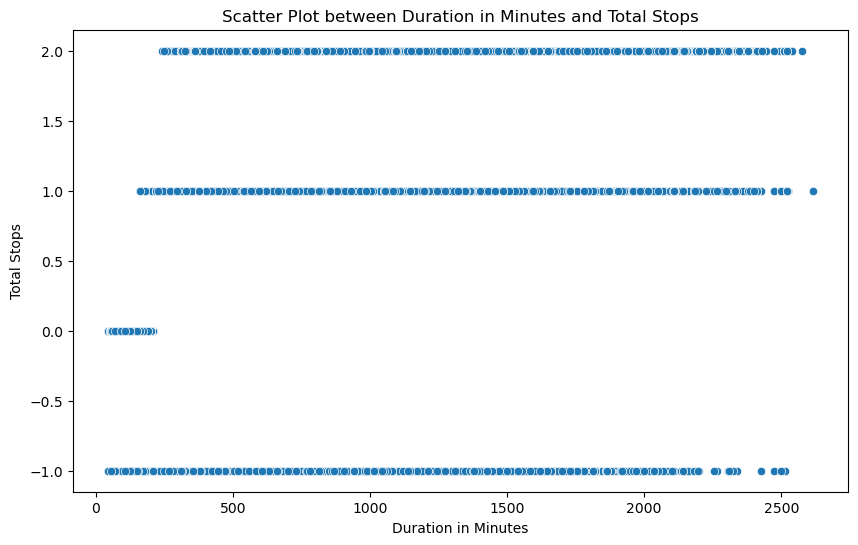

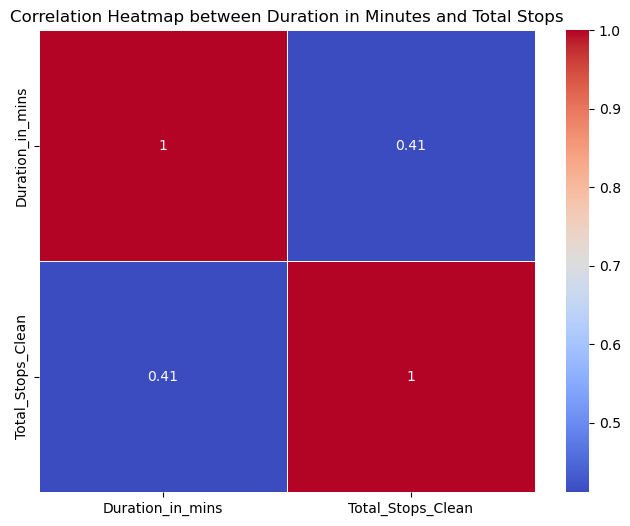

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def standardize_stops(stops):
    if pd.isna(stops):
        return -1
    stops = stops.lower()
    if 'non-stop' in stops:
        return 0
    elif '1-stop' in stops:
        return 1
    elif '2+' in stops:
        return 2
    else:
        return 1 

df['Total_Stops_Clean'] = df['Total Stops'].apply(standardize_stops)

df['Duration_in_mins'] = pd.to_numeric(df['Duration_in_mins'], errors='coerce')

df = df.dropna(subset=['Duration_in_mins', 'Total_Stops_Clean'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_in_mins', y='Total_Stops_Clean', data=df)
plt.title('Scatter Plot between Duration in Minutes and Total Stops')
plt.xlabel('Duration in Minutes')
plt.ylabel('Total Stops')
plt.show()

correlation_matrix = df[['Duration_in_mins', 'Total_Stops_Clean']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Duration in Minutes and Total Stops')
plt.show()

In [245]:
df.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19,0.0,7,25.0,Evening,Early Morning,1
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,NaN,8895.0,3,6,2023,9,0.0,21,40.0,Morning,Night,-1
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,NaN,8895.0,6,3,2023,17,50.0,7,25.0,Evening,Early Morning,-1
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,1-stop,8895.0,3,6,2023,8,0.0,21,40.0,Early Morning,Night,1
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,1-stop,8895.0,3,6,2023,22,30.0,12,25.0,Night,Morning,1


In [246]:
df['Total Stops'].value_counts()

Total Stops
1-stop                                          357775
non-stop                                         50433
2+-stop                                          29919
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           1427
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         299
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          266
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           266
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati        82
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR             80
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ             64
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai          45
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             41
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB             10
Name: count, dtype: int64

In [247]:
df['Total_Stops_Clean'].value_counts()

Total_Stops_Clean
 1    360355
 0     50433
 2     29919
-1      9012
Name: count, dtype: int64

In [248]:
df.isnull().sum()

Airline_Company               0
Flight_Class                  0
Departure_City                0
Arrival_City                  0
Duration_in_mins              0
Total Stops                9012
Price                      9000
Journey_day                   0
Journey_month                 0
Journey_year                  0
Departure_Time_hour           0
Departure_Time_minute      8961
Arrival_Time_hour             0
Arrival_Time_minute        8977
Departure_Time_Category       0
Arrival_Time_Category         0
Total_Stops_Clean             0
dtype: int64

In [249]:
mean_prices = df[df['Price'] != -1].groupby('Airline_Company')['Price'].mean()

df['Price'] = df['Price'].fillna('-1')

def replace_with_mean(row):
    if row['Price'] == -1:
        return mean_prices.get(row['Airline_Company'], np.nan)
    else:
        return row['Price']

df['Price'] = df.apply(replace_with_mean, axis=1)


In [250]:
df.isnull().sum()

Airline_Company               0
Flight_Class                  0
Departure_City                0
Arrival_City                  0
Duration_in_mins              0
Total Stops                9012
Price                         0
Journey_day                   0
Journey_month                 0
Journey_year                  0
Departure_Time_hour           0
Departure_Time_minute      8961
Arrival_Time_hour             0
Arrival_Time_minute        8977
Departure_Time_Category       0
Arrival_Time_Category         0
Total_Stops_Clean             0
dtype: int64

In [251]:
df.sample(20)

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
19626,AirAsia,ECONOMY,Delhi,Chennai,810.0,1-stop,6269.0,20,2,2023,19,5.0,8,35.0,Evening,Early Morning,1
418121,Air India,BUSINESS,Chennai,Mumbai,1055.0,1-stop,49713.0,2,4,2023,15,40.0,9,15.0,Noon,Morning,1
369473,Air India,BUSINESS,Delhi,Bangalore,600.0,1-stop,56825.0,24,2,2023,-1,NaN,16,25.0,missing,Noon,1
325336,Vistara,PREMIUMECONOMY,Bangalore,Chennai,1620.0,1-stop,20607.0,2,1,2023,19,40.0,22,40.0,Evening,Night,1
254905,Air India,BUSINESS,Mumbai,Bangalore,670.0,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR,54608.0,2,1,2023,7,20.0,18,30.0,Early Morning,Evening,1
442177,Vistara,ECONOMY,Chennai,Kolkata,770.0,1-stop,13210.0,24,1,2023,7,0.0,19,50.0,Early Morning,Evening,1
261168,GO FIRST,ECONOMY,Mumbai,Bangalore,830.0,1-stop,6312.0,21,2,2023,18,50.0,8,40.0,Evening,Early Morning,1
216052,Vistara,BUSINESS,Ahmedabad,Mumbai,535.0,1-stop,83385.0,22,1,2023,8,40.0,17,35.0,Early Morning,Evening,1
181659,Vistara,PREMIUMECONOMY,Delhi,Bangalore,385.0,1-stop,11388.0,20,2,2023,12,50.0,19,15.0,Morning,Evening,1
398080,Vistara,BUSINESS,Kolkata,Delhi,1235.0,1-stop,53761.0,2,4,2023,17,30.0,14,5.0,Evening,Noon,1


In [252]:
df.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,1-stop,8895.0,3,6,2023,19,0.0,7,25.0,Evening,Early Morning,1
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,NaN,8895.0,3,6,2023,9,0.0,21,40.0,Morning,Night,-1
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,NaN,8895.0,6,3,2023,17,50.0,7,25.0,Evening,Early Morning,-1
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,1-stop,8895.0,3,6,2023,8,0.0,21,40.0,Early Morning,Night,1
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,1-stop,8895.0,3,6,2023,22,30.0,12,25.0,Night,Morning,1


In [253]:
df['Duration_in_mins'].value_counts()

Duration_in_mins
135.0     4958
130.0     3636
375.0     3438
400.0     3422
380.0     3360
          ... 
2395.0       1
2405.0       1
2365.0       1
2290.0       1
2575.0       1
Name: count, Length: 481, dtype: int64

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          449719 non-null  object 
 1   Flight_Class             449719 non-null  object 
 2   Departure_City           449719 non-null  object 
 3   Arrival_City             449719 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Total Stops              440707 non-null  object 
 6   Price                    449719 non-null  object 
 7   Journey_day              449719 non-null  int32  
 8   Journey_month            449719 non-null  int32  
 9   Journey_year             449719 non-null  int32  
 10  Departure_Time_hour      449719 non-null  int64  
 11  Departure_Time_minute    440758 non-null  float64
 12  Arrival_Time_hour        449719 non-null  int64  
 13  Arrival_Time_minute      440742 non-null  float64
 14  Departure

In [255]:
df['Departure_Time_Category'].value_counts()

Departure_Time_Category
Early Morning    121718
Evening          109569
Morning           93378
Noon              68049
Night             42729
missing            8961
Late Night         5315
Name: count, dtype: int64

In [256]:
categorical_columns = ['Departure_Time_Category', 'Arrival_Time_Category']

for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('missing', mode_value)
    print(f"Filled 'missing' values in {column} with mode: {mode_value}")

Filled 'missing' values in Departure_Time_Category with mode: Early Morning
Filled 'missing' values in Arrival_Time_Category with mode: Evening


In [257]:
df['Arrival_Time_Category'].value_counts()

Arrival_Time_Category
Evening          133247
Night             90453
Morning           81165
Noon              58302
Early Morning     57570
Late Night        28982
Name: count, dtype: int64

In [258]:
df['Departure_Time_Category'].value_counts()

Departure_Time_Category
Early Morning    130679
Evening          109569
Morning           93378
Noon              68049
Night             42729
Late Night         5315
Name: count, dtype: int64

In [259]:
df['Total_Stops_Clean'].value_counts()

Total_Stops_Clean
 1    360355
 0     50433
 2     29919
-1      9012
Name: count, dtype: int64

In [260]:
# filling the missing values in the column 'Total_Stops_Clean' which is denoted as -1. with the mode 
mode_value = df['Total_Stops_Clean'][df['Total_Stops_Clean'] != -1].mode()[0]
df['Total_Stops_Clean'] = df['Total_Stops_Clean'].replace(-1, mode_value)

In [261]:
df['Total_Stops_Clean'].value_counts()

Total_Stops_Clean
1    369367
0     50433
2     29919
Name: count, dtype: int64

In [262]:
df.isnull().sum()

Airline_Company               0
Flight_Class                  0
Departure_City                0
Arrival_City                  0
Duration_in_mins              0
Total Stops                9012
Price                         0
Journey_day                   0
Journey_month                 0
Journey_year                  0
Departure_Time_hour           0
Departure_Time_minute      8961
Arrival_Time_hour             0
Arrival_Time_minute        8977
Departure_Time_Category       0
Arrival_Time_Category         0
Total_Stops_Clean             0
dtype: int64

In [263]:
df['Price'] = df['Price'].astype(int)
mean_prices = df[df['Price'] != -1].groupby('Airline_Company')['Price'].mean()

print("Airline_Company wise mean Price:")
print(mean_prices)

def replace_with_mean(row):
    if row['Price'] == -1:
        return mean_prices.get(row['Airline_Company'], np.nan)
    else:
        return row['Price']
df['Price'] = df.apply(replace_with_mean, axis=1)

Airline_Company wise mean Price:
Airline_Company
Air India       26938.807504
AirAsia          7086.714892
AkasaAir         3570.106303
AllianceAir      4073.787234
GO FIRST         8025.846206
Indigo           8198.683541
SpiceJet         8124.328959
StarAir          9549.711864
Vistara         27074.894059
Name: Price, dtype: float64


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          449719 non-null  object 
 1   Flight_Class             449719 non-null  object 
 2   Departure_City           449719 non-null  object 
 3   Arrival_City             449719 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Total Stops              440707 non-null  object 
 6   Price                    449719 non-null  float64
 7   Journey_day              449719 non-null  int32  
 8   Journey_month            449719 non-null  int32  
 9   Journey_year             449719 non-null  int32  
 10  Departure_Time_hour      449719 non-null  int64  
 11  Departure_Time_minute    440758 non-null  float64
 12  Arrival_Time_hour        449719 non-null  int64  
 13  Arrival_Time_minute      440742 non-null  float64
 14  Departure

<Axes: xlabel='Price', ylabel='Duration_in_mins'>

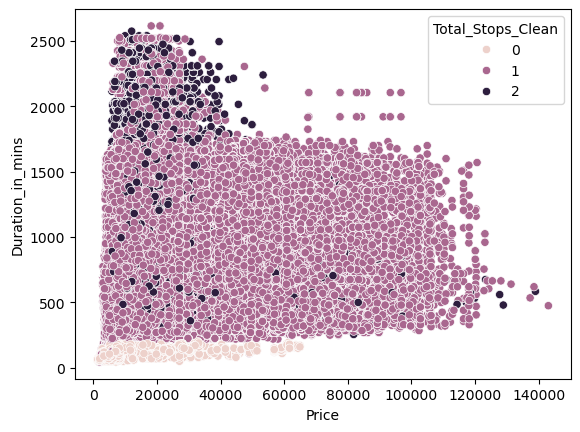

In [265]:
sns.scatterplot(x="Price" , y="Duration_in_mins" , hue="Total_Stops_Clean", data=df)

In [266]:
df['Price'].value_counts()

Price
27074.894059    4700
54879.000000    2641
54608.000000    2470
26938.807504    2280
49613.000000    2074
                ... 
10262.000000       1
5809.000000        1
8672.000000        1
27689.000000       1
25113.000000       1
Name: count, Length: 20601, dtype: int64

In [267]:
df['Price'].max()

143019.0

In [268]:
df['Price'].min()

1307.0

In [269]:
df.isnull().sum()

Airline_Company               0
Flight_Class                  0
Departure_City                0
Arrival_City                  0
Duration_in_mins              0
Total Stops                9012
Price                         0
Journey_day                   0
Journey_month                 0
Journey_year                  0
Departure_Time_hour           0
Departure_Time_minute      8961
Arrival_Time_hour             0
Arrival_Time_minute        8977
Departure_Time_Category       0
Arrival_Time_Category         0
Total_Stops_Clean             0
dtype: int64

In [270]:
cols_to_dropp = ["Total Stops", "Departure_Time_minute", "Arrival_Time_minute"]

df.drop(cols_to_dropp, axis=1, inplace=True)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          449719 non-null  object 
 1   Flight_Class             449719 non-null  object 
 2   Departure_City           449719 non-null  object 
 3   Arrival_City             449719 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Price                    449719 non-null  float64
 6   Journey_day              449719 non-null  int32  
 7   Journey_month            449719 non-null  int32  
 8   Journey_year             449719 non-null  int32  
 9   Departure_Time_hour      449719 non-null  int64  
 10  Arrival_Time_hour        449719 non-null  int64  
 11  Departure_Time_Category  449719 non-null  object 
 12  Arrival_Time_Category    449719 non-null  object 
 13  Total_Stops_Clean        449719 non-null  int64  
dtypes: float6

In [286]:
# df = df.drop('Arrival_Time_Category', axis=1)

In [287]:
cat_col = [col for col in df.columns if df[col].dtype=="object"]

In [288]:
num_col = [col for col in df.columns if df[col].dtype!="object"]

In [289]:
cat_col

['Airline_Company',
 'Flight_Class',
 'Departure_City',
 'Arrival_City',
 'Departure_Time_Category']

In [290]:
num_col

['Duration_in_mins',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Departure_Time_hour',
 'Arrival_Time_hour',
 'Total_Stops_Clean']

In [292]:
import pandas as pd

columns_to_encode = ['Airline_Company', 'Departure_City', 'Arrival_City', 'Departure_Time_Category']

df_encoded = pd.get_dummies(df, columns=columns_to_encode)

flight_class_mapping = {
    'ECONOMY': 1,
    'PREMIUMECONOMY': 2,
    'BUSINESS': 3,
    'FIRST': 4
}

df_encoded['Flight_Class_Encoded'] = df['Flight_Class'].map(flight_class_mapping)

df_encoded.drop(columns=['Flight_Class'], inplace=True)

df = df_encoded

print(df.head())


   Duration_in_mins   Price  Journey_day  Journey_month  Journey_year  \
0             745.0  8895.0            3              6          2023   
1             760.0  8895.0            3              6          2023   
2             815.0  8895.0            6              3          2023   
3             820.0  8895.0            3              6          2023   
4             835.0  8895.0            3              6          2023   

   Departure_Time_hour  Arrival_Time_hour  Total_Stops_Clean  \
0                   19                  7                  1   
1                    9                 21                  1   
2                   17                  7                  1   
3                    8                 21                  1   
4                   22                 12                  1   

   Airline_Company_Air India   Airline_Company_AirAsia   ...  \
0                        True                     False  ...   
1                        True                   

In [293]:
df.head()

,Duration_in_mins,Price,Journey_day,Journey_month,Journey_year,Departure_Time_hour,Arrival_Time_hour,Total_Stops_Clean,Airline_Company_Air India,Airline_Company_AirAsia,...,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded
0,745.0,8895.0,3,6,2023,19,7,1,True,False,...,True,False,False,False,True,False,False,False,False,1
1,760.0,8895.0,3,6,2023,9,21,1,True,False,...,True,False,False,False,False,False,True,False,False,1
2,815.0,8895.0,6,3,2023,17,7,1,True,False,...,True,False,False,False,True,False,False,False,False,1
3,820.0,8895.0,3,6,2023,8,21,1,True,False,...,True,False,False,True,False,False,False,False,False,1
4,835.0,8895.0,3,6,2023,22,12,1,True,False,...,True,False,False,False,False,False,False,True,False,1


In [295]:
df = df.drop(['Departure_Time_hour', 'Arrival_Time_hour'], axis=1)

In [298]:
df = df.drop(['Journey_year'], axis=1)

In [299]:
df.head()

,Duration_in_mins,Price,Journey_day,Journey_month,Total_Stops_Clean,Airline_Company_Air India,Airline_Company_AirAsia,Airline_Company_AkasaAir,Airline_Company_AllianceAir,Airline_Company_GO FIRST,...,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded
0,745.0,8895.0,3,6,1,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,1
1,760.0,8895.0,3,6,1,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,1
2,815.0,8895.0,6,3,1,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,1
3,820.0,8895.0,3,6,1,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,1
4,835.0,8895.0,3,6,1,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,1


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Duration_in_mins                       449719 non-null  float64
 1   Price                                  449719 non-null  float64
 2   Journey_day                            449719 non-null  int32  
 3   Journey_month                          449719 non-null  int32  
 4   Total_Stops_Clean                      449719 non-null  int64  
 5   Airline_Company_Air India              449719 non-null  bool   
 6   Airline_Company_AirAsia                449719 non-null  bool   
 7   Airline_Company_AkasaAir               449719 non-null  bool   
 8   Airline_Company_AllianceAir            449719 non-null  bool   
 9   Airline_Company_GO FIRST               449719 non-null  bool   
 10  Airline_Company_Indigo                 449719 non-null  bool 

In [ ]:
# import pandas as pd
# df['Total_Stops_Clean'] = df['Total_Stops_Clean'].astype('category')

# # Apply one-hot encoding
# df_encoded = pd.get_dummies(df, columns=['Total_Stops_Clean'])

# # Print the first few rows to check the encoding
# print(df_encoded.head())

In [301]:
df['Total_Stops_Clean'] = df['Total_Stops_Clean'].astype('category')

df_encoded_stops = pd.get_dummies(df['Total_Stops_Clean'], prefix='Stops')

df.drop('Total_Stops_Clean', axis=1, inplace=True)

df = pd.concat([df, df_encoded_stops], axis=1)

df.head()


,Duration_in_mins,Price,Journey_day,Journey_month,Airline_Company_Air India,Airline_Company_AirAsia,Airline_Company_AkasaAir,Airline_Company_AllianceAir,Airline_Company_GO FIRST,Airline_Company_Indigo,...,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded,Stops_0,Stops_1,Stops_2
0,745.0,8895.0,3,6,True,False,False,False,False,False,...,False,True,False,False,False,False,1,False,True,False
1,760.0,8895.0,3,6,True,False,False,False,False,False,...,False,False,False,True,False,False,1,False,True,False
2,815.0,8895.0,6,3,True,False,False,False,False,False,...,False,True,False,False,False,False,1,False,True,False
3,820.0,8895.0,3,6,True,False,False,False,False,False,...,True,False,False,False,False,False,1,False,True,False
4,835.0,8895.0,3,6,True,False,False,False,False,False,...,False,False,False,False,True,False,1,False,True,False


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 37 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Duration_in_mins                       449719 non-null  float64
 1   Price                                  449719 non-null  float64
 2   Journey_day                            449719 non-null  int32  
 3   Journey_month                          449719 non-null  int32  
 4   Airline_Company_Air India              449719 non-null  bool   
 5   Airline_Company_AirAsia                449719 non-null  bool   
 6   Airline_Company_AkasaAir               449719 non-null  bool   
 7   Airline_Company_AllianceAir            449719 non-null  bool   
 8   Airline_Company_GO FIRST               449719 non-null  bool   
 9   Airline_Company_Indigo                 449719 non-null  bool   
 10  Airline_Company_SpiceJet               449719 non-null  bool 

In [303]:
X = df.drop(['Price'], axis=1)

In [304]:
y = df['Price']

In [305]:
from sklearn.feature_selection import mutual_info_regression

In [306]:
imp = mutual_info_regression(X , y)

In [307]:
imp

array([2.02713378, 0.27305065, 0.23646448, 0.36853865, 0.1064874 ,
       0.02567367, 0.00624282, 0.07804849, 0.27096092, 0.04082202,
       0.        , 0.44057948, 0.23708835, 0.34754048, 0.29007185,
       0.32984052, 0.28357491, 0.28742408, 0.35795665, 0.21313006,
       0.31769059, 0.25919498, 0.31167706, 0.25634396, 0.25436947,
       0.29216607, 0.08853772, 0.08770006, 0.02290442, 0.08494287,
       0.06887186, 0.07674299, 0.86611762, 0.28502681, 0.30968211,
       0.13809247])

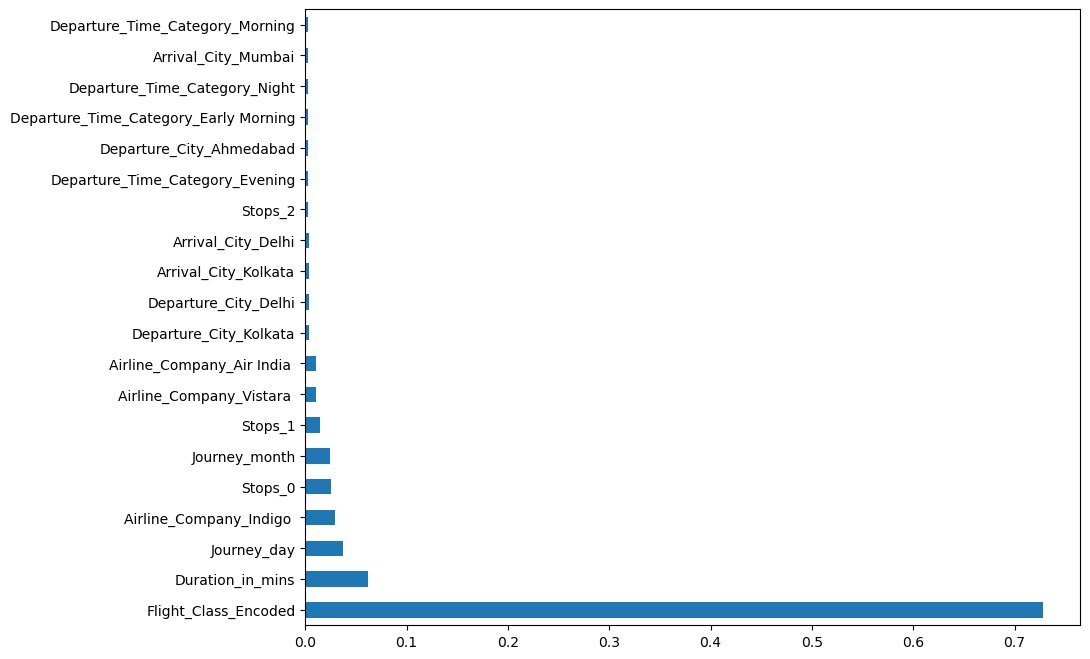

In [308]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [309]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [310]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("Linear Regression Score on Training set is", lin_reg.score(X_train, y_train))
print("Linear Regression Score on Test Set is", lin_reg.score(X_test, y_test))

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

accuracies = cross_val_score(lin_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

accuracies = np.sqrt(-accuracies)

print(accuracies)
print("RMSE: {:.2f}".format(accuracies.mean()))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(mse))

print('The r2_score is', r2_score(y_test, y_pred))


Linear Regression Score on Training set is 0.7294139973510474
Linear Regression Score on Test Set is 0.7304156974043303
[10467.62556291 10421.14018344 10557.66101702 10491.33753481
 10422.7353651 ]
RMSE: 10472.10
Standard Deviation: 50.49
Mean Absolute Error: 7072.405677581189
Mean Squared Error: 109832479.5678757
RMSE: 10480.099215554961
The r2_score is 0.7304156974043303


In [314]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


dt_reg = DecisionTreeRegressor(random_state=0)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("Decision Tree Score on Training set is", dt_reg.score(X_train, y_train))
print("Decision Tree Score on Test Set is", dt_reg.score(X_test, y_test))

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

accuracies = cross_val_score(dt_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

accuracies = np.sqrt(-accuracies)

print(accuracies)
print("RMSE: {:.2f}".format(accuracies.mean()))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(mse))

print('The r2_score is', r2_score(y_test, y_pred))


Decision Tree Score on Training set is 0.994071721833185
Decision Tree Score on Test Set is 0.8365373700769875
[8308.31077877 8397.20383331 8374.30029378 8232.344067   8238.19914466]
RMSE: 8310.07
Standard Deviation: 67.72
Mean Absolute Error: 3638.7469090952586
Mean Squared Error: 66597000.59783412
RMSE: 8160.698536144692
The r2_score is 0.8365373700769875


Random Forest Score on Training set is 0.9271393491345387
Random Forest Score on Test Set is 0.9048461457413098
[0.90469085 0.90269512 0.90398516 0.90339895 0.9023631  0.90433493
 0.89963116 0.90366753 0.90310108 0.90577261]
Accuracy: 90.34 %
Standard Deviation: 0.16 %
Mean Absolute Error: 3336.074695713531
Mean Squared Error: 38767033.73692682
RMSE: 6226.31783134517
The r2_score is 0.9048461457413098


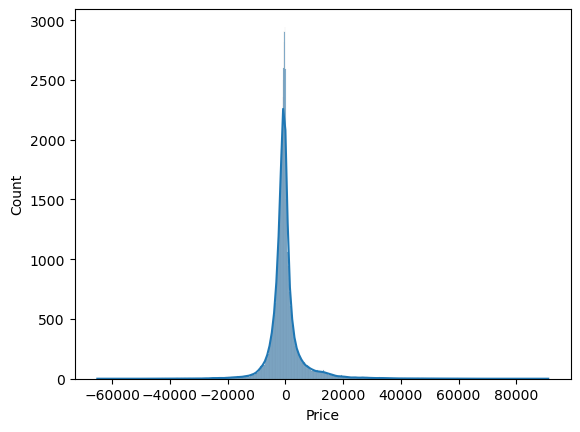

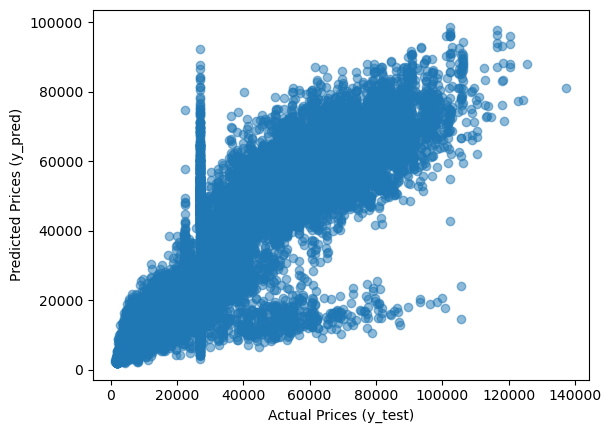

In [321]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined
# Create the kfold object for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest Regressor with corrected max_features parameter
rf_reg = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=15,
    min_samples_leaf=2,
    max_features='sqrt',  # Changed from 'auto' to 'sqrt'
    max_depth=30
)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Training and testing accuracy
print("Random Forest Score on Training set is", rf_reg.score(X_train, y_train))
print("Random Forest Score on Test Set is", rf_reg.score(X_test, y_test))

# Cross-validation accuracy
accuracies = cross_val_score(rf_reg, X_train, y_train, cv=kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('The r2_score is', r2)

# Distribution plot of residuals
sns.histplot(y_test - y_pred, kde=True)
plt.show()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.show()
